In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\KUMAR SUNDRAM\\Downloads\\Oil and Gas Domain'

In [2]:
# Problem statement : The goal is to predict the daily Production of oil wells.
# Data Collection : no need to worry, but if you want, pls visit data.gov website, search on kaggle/UCI machine learning
# data preprocessing
data = pd.read_csv('Oil_Well_dataset.csv')
data.head()

,WellID,Depth,YearDrilled,WellType,Geology,Production,Age,ProductionPerDepth
0,1,1360,2009,Offshore,Sandstone,464,15,0.341176
1,2,4272,2010,Offshore,Sandstone,339,14,0.079354
2,3,3592,1976,Onshore,Shale,387,48,0.107739
3,4,966,1973,Onshore,Shale,297,51,0.307453
4,5,4926,1968,Offshore,Sandstone,403,56,0.081811


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              1000 non-null   int64  
 1   Depth               1000 non-null   int64  
 2   YearDrilled         1000 non-null   int64  
 3   WellType            1000 non-null   object 
 4   Geology             1000 non-null   object 
 5   Production          1000 non-null   int64  
 6   Age                 1000 non-null   int64  
 7   ProductionPerDepth  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [4]:
data.isnull().sum()

WellID                0
Depth                 0
YearDrilled           0
WellType              0
Geology               0
Production            0
Age                   0
ProductionPerDepth    0
dtype: int64

In [5]:
# Encoding part
# Convert categorical features to numerical
data['WellType'].value_counts()

WellType
Offshore    519
Onshore     481
Name: count, dtype: int64

In [6]:
data['Geology'].value_counts()

Geology
Sandstone    341
Shale        341
Limestone    318
Name: count, dtype: int64

In [7]:
data = pd.get_dummies(data, columns=['WellType','Geology'], drop_first=True)
data.head()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1,1360,2009,464,15,0.341176,False,True,False
1,2,4272,2010,339,14,0.079354,False,True,False
2,3,3592,1976,387,48,0.107739,True,False,True
3,4,966,1973,297,51,0.307453,True,False,True
4,5,4926,1968,403,56,0.081811,False,True,False


In [8]:
data['WellID'].nunique()

1000

In [9]:
data.describe()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2815.422000,1991.804000,271.519000,32.196000,0.133407
std,288.819436,1255.514921,18.185772,130.117386,18.185772,0.124346
min,1.000000,503.000000,1960.000000,50.000000,1.000000,0.010781
25%,250.750000,1749.500000,1976.000000,155.750000,16.750000,0.053152
50%,500.500000,2862.500000,1992.000000,266.000000,32.000000,0.096448
75%,750.250000,3849.500000,2007.250000,387.000000,48.000000,0.158240
max,1000.000000,4999.000000,2023.000000,499.000000,64.000000,0.851064


In [10]:
x = data.drop('Production', axis=1)
y = data['Production']
x.head()

,WellID,Depth,YearDrilled,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1,1360,2009,15,0.341176,False,True,False
1,2,4272,2010,14,0.079354,False,True,False
2,3,3592,1976,48,0.107739,True,False,True
3,4,966,1973,51,0.307453,True,False,True
4,5,4926,1968,56,0.081811,False,True,False


In [11]:
x['WellType_Onshore'] = np.where(x['WellType_Onshore']==False, 0,1)
x['Geology_Sandstone'] =  np.where(x['Geology_Sandstone']==False, 0,1)
x['Geology_Shale'] =  np.where(x['Geology_Shale']==False, 0,1)

In [12]:
x.head()

,WellID,Depth,YearDrilled,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1,1360,2009,15,0.341176,0,1,0
1,2,4272,2010,14,0.079354,0,1,0
2,3,3592,1976,48,0.107739,1,0,1
3,4,966,1973,51,0.307453,1,0,1
4,5,4926,1968,56,0.081811,0,1,0


In [13]:
x = x.drop(['WellID','YearDrilled'], axis=1)
x.head()

,Depth,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1360,15,0.341176,0,1,0
1,4272,14,0.079354,0,1,0
2,3592,48,0.107739,1,0,1
3,966,51,0.307453,1,0,1
4,4926,56,0.081811,0,1,0


In [42]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_sc = scale.fit_transform(x_train1)
x_test_sc = scale.transform(x_test1)

In [16]:
pd.DataFrame(x_train_sc).shape

(800, 6)

In [17]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_train_sc
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['features'] = x.columns
vif

,variance_inflation_factor,features
0,1.792967,Depth
1,1.005990,Age
2,1.791684,ProductionPerDepth
3,1.001374,WellType_Onshore
4,1.368329,Geology_Sandstone
5,1.370647,Geology_Shale


In [18]:
#data['Age1'] = 2024 - data['YearDrilled']
#data

In [19]:
data['ProductionPerDepth1'] = data['Production']/data['Depth']

In [20]:
data.head()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale,ProductionPerDepth1
0,1,1360,2009,464,15,0.341176,False,True,False,0.341176
1,2,4272,2010,339,14,0.079354,False,True,False,0.079354
2,3,3592,1976,387,48,0.107739,True,False,True,0.107739
3,4,966,1973,297,51,0.307453,True,False,True,0.307453
4,5,4926,1968,403,56,0.081811,False,True,False,0.081811


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WellID               1000 non-null   int64  
 1   Depth                1000 non-null   int64  
 2   YearDrilled          1000 non-null   int64  
 3   Production           1000 non-null   int64  
 4   Age                  1000 non-null   int64  
 5   ProductionPerDepth   1000 non-null   float64
 6   WellType_Onshore     1000 non-null   bool   
 7   Geology_Sandstone    1000 non-null   bool   
 8   Geology_Shale        1000 non-null   bool   
 9   ProductionPerDepth1  1000 non-null   float64
dtypes: bool(3), float64(2), int64(5)
memory usage: 57.7 KB


In [22]:
data.head()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale,ProductionPerDepth1
0,1,1360,2009,464,15,0.341176,False,True,False,0.341176
1,2,4272,2010,339,14,0.079354,False,True,False,0.079354
2,3,3592,1976,387,48,0.107739,True,False,True,0.107739
3,4,966,1973,297,51,0.307453,True,False,True,0.307453
4,5,4926,1968,403,56,0.081811,False,True,False,0.081811


In [23]:
col = list(data.columns)
categorical_features = []
numerical_features = []

for i in col:
    if len(data[i].unique()) >6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features :', *categorical_features)
print()
print("numerical_features :", *numerical_features)

categorical_features : WellType_Onshore Geology_Sandstone Geology_Shale

numerical_features : WellID Depth YearDrilled Production Age ProductionPerDepth ProductionPerDepth1


In [24]:
categorical_features

['WellType_Onshore', 'Geology_Sandstone', 'Geology_Shale']

In [25]:
numerical_features

['WellID',
 'Depth',
 'YearDrilled',
 'Production',
 'Age',
 'ProductionPerDepth',
 'ProductionPerDepth1']

In [26]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

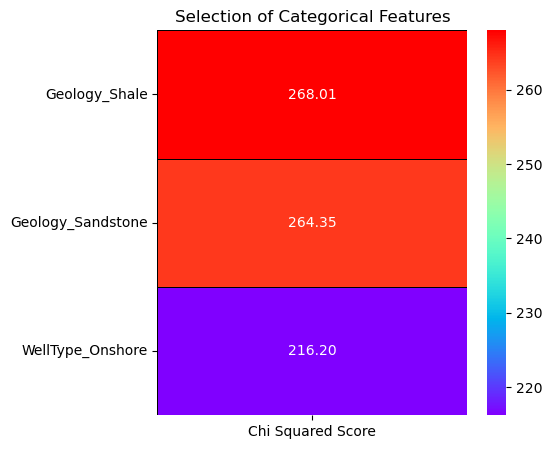

In [28]:
# Chi-Square Test :
features = data.loc[:,categorical_features] # char Independent variable
target = data.loc[:,'Production'] # cat Dep variable
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = 'rainbow', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [29]:
data.loc[:,categorical_features]

,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,False,True,False
1,False,True,False
2,True,False,True
3,True,False,True
4,False,True,False
...,...,...,...
995,False,True,False
996,False,False,True
997,False,False,True
998,False,False,False


In [30]:
data.loc[:,'Production']

0      464
1      339
2      387
3      297
4      403
      ... 
995    110
996    412
997    359
998    137
999    373
Name: Production, Length: 1000, dtype: int64

In [31]:
# ANOVA Testing
from sklearn.feature_selection import f_classif

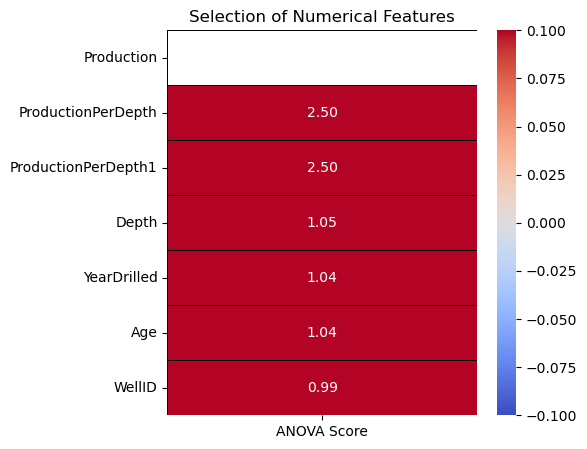

In [32]:
# Anova Testing

features = data.loc[:,numerical_features]
target = data.loc[:,'Production']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

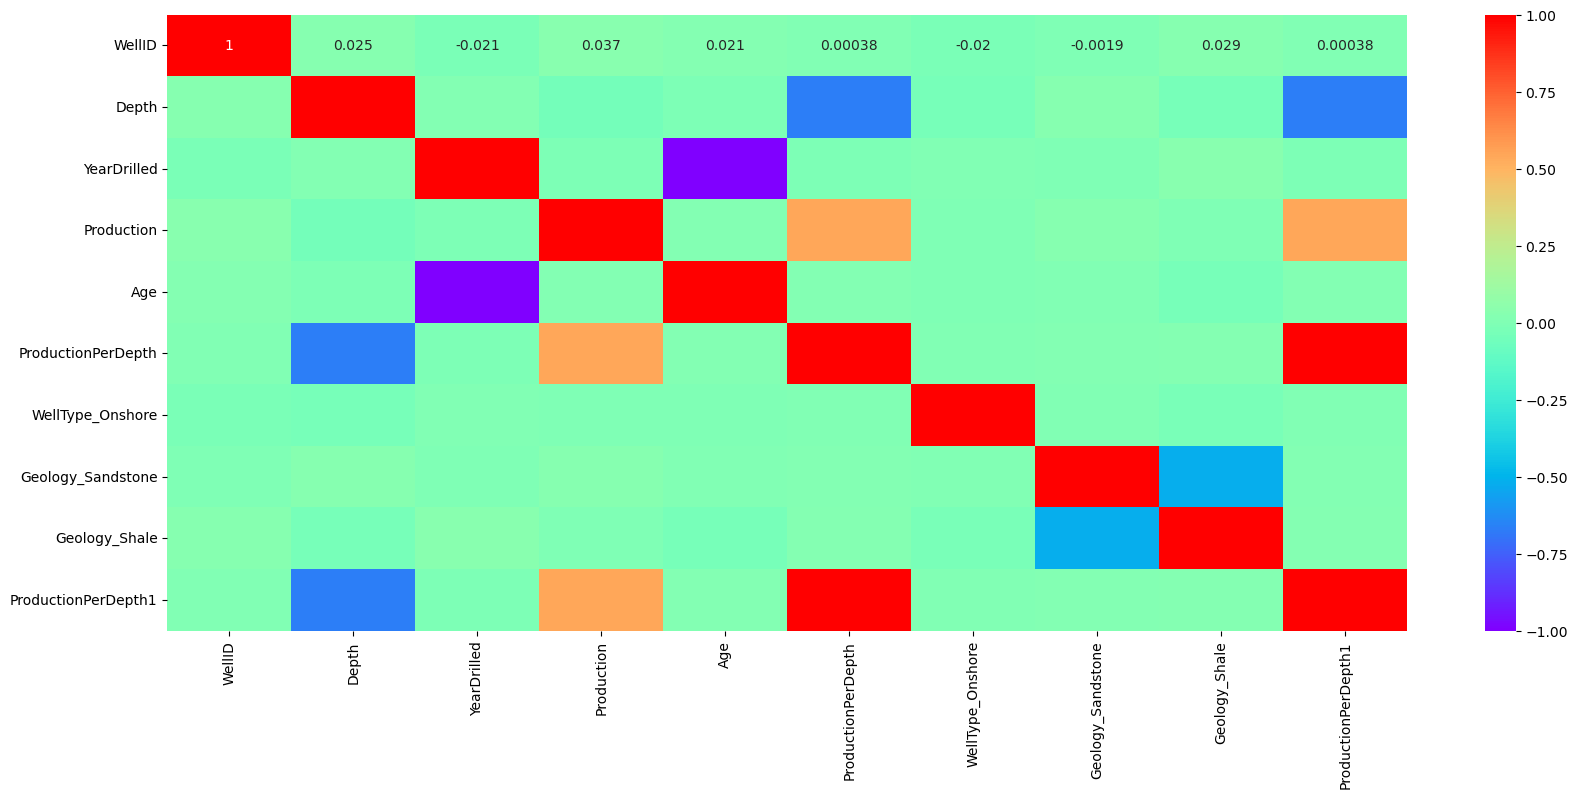

In [33]:
# Correlation part :

plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), cmap='rainbow', annot=True);

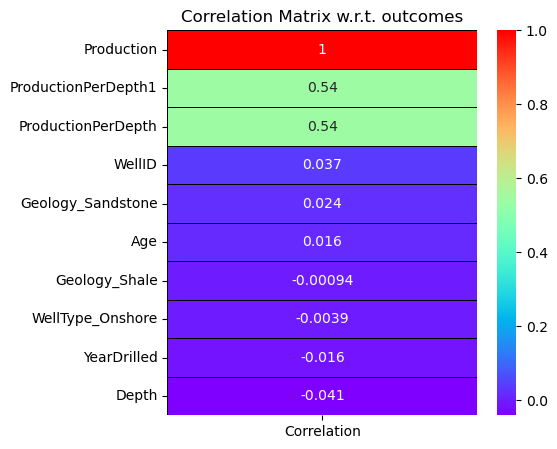

In [34]:
corr = data.corrwith(data['Production']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [35]:
x.head()

,Depth,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
0,1360,15,0.341176,0,1,0
1,4272,14,0.079354,0,1,0
2,3592,48,0.107739,1,0,1
3,966,51,0.307453,1,0,1
4,4926,56,0.081811,0,1,0


In [38]:
x.describe()

,Depth,Age,ProductionPerDepth,WellType_Onshore,Geology_Sandstone,Geology_Shale
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2815.422000,32.196000,0.133407,0.481000,0.341000,0.341000
std,1255.514921,18.185772,0.124346,0.499889,0.474283,0.474283
min,503.000000,1.000000,0.010781,0.000000,0.000000,0.000000
25%,1749.500000,16.750000,0.053152,0.000000,0.000000,0.000000
50%,2862.500000,32.000000,0.096448,0.000000,0.000000,0.000000
75%,3849.500000,48.000000,0.158240,1.000000,1.000000,1.000000
max,4999.000000,64.000000,0.851064,1.000000,1.000000,1.000000


In [36]:
y.head()

0    464
1    339
2    387
3    297
4    403
Name: Production, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [39]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [40]:
reg_model = smf.OLS(endog=y_train, exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Production   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1213.
Date:                Sun, 30 Jun 2024   Prob (F-statistic):                        0.00
Time:                        21:12:58   Log-Likelihood:                         -4777.8
No. Observations:                 800   AIC:                                      9568.
Df Residuals:                     794   BIC:                                      9596.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Depth                  0.0559      0.002     26.572      0.000       0.052       0.060
Age                   -0.2183      0.174     -1.255      0.210      -0.560       0.123
ProductionPerDepth   934.0996     26.580     35.143      0.000     881.924     986.276
WellType_Onshore       3.9521      6.563      0.602      0.547      -8.931      16.835
Geology_Sandstone     -6.1986      8.097     -0.766      0.444     -22.093       9.696
Geology_Shale         -4.9392      8.018     -0.616      0.538     -20.678      10.799
==============================================================================
Omnibus:                       13.530   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.576
Skew:                          -0.226   Prob(JB):                      0.00306
Kurtosis:                       2.622   Cond. No.                     2.48e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
reg_model1 = smf.OLS(endog=y_test, exog=x_test).fit()
reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Production   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              310.4
Date:                Sun, 30 Jun 2024   Prob (F-statistic):                    1.39e-96
Time:                        21:16:47   Log-Likelihood:                         -1184.4
No. Observations:                 200   AIC:                                      2381.
Df Residuals:                     194   BIC:                                      2401.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Depth                  0.0495      0.004     11.702      0.000       0.041       0.058
Age                    0.5501      0.326      1.686      0.093      -0.093       1.193
ProductionPerDepth   892.9177     49.554     18.019      0.000     795.185     990.650
WellType_Onshore      -8.8757     12.690     -0.699      0.485     -33.903      16.152
Geology_Sandstone      2.5239     15.639      0.161      0.872     -28.320      33.367
Geology_Shale         -4.5467     15.269     -0.298      0.766     -34.662      25.568
==============================================================================
Omnibus:                       12.236   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.997
Skew:                           0.014   Prob(JB):                       0.0822
Kurtosis:                       2.226   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# With scaled data
reg_model = smf.OLS(endog=y_train1, exog=x_train_sc).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Production   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              13.46
Date:                Sun, 30 Jun 2024   Prob (F-statistic):                    1.40e-14
Time:                        21:19:02   Log-Likelihood:                         -5668.0
No. Observations:                 800   AIC:                                  1.135e+04
Df Residuals:                     794   BIC:                                  1.138e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            75.8644     13.729      5.526      0.000      48.915     102.814
x2            -1.5653     10.284     -0.152      0.879     -21.752      18.621
x3           123.0389     13.724      8.965      0.000      96.099     149.979
x4             1.4577     10.260      0.142      0.887     -18.682      21.598
x5            -1.0646     11.994     -0.089      0.929     -24.607      22.478
x6            -1.1769     12.004     -0.098      0.922     -24.740      22.386
==============================================================================
Omnibus:                       14.133   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.333
Skew:                          -0.309   Prob(JB):                     0.000772
Kurtosis:                       2.779   Cond. No.                         2.24
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred_lm_train = lm.predict(x_train)
y_pred_lm_test = lm.predict(x_test)

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [51]:
print("Linear_Model_Training_Accuracy", r2_score(y_train, y_pred_lm_train))
print()
print("Linear_Model_Test_Accuracy", r2_score(y_test, y_pred_lm_test))

Linear_Model_Training_Accuracy 0.46717909801512736

Linear_Model_Test_Accuracy 0.5056151655620388


In [52]:
lm = LinearRegression()
lm.fit(x_train_sc, y_train1)
y_pred_lm_train1 = lm.predict(x_train_sc)
y_pred_lm_test1 = lm.predict(x_test_sc)

In [53]:
print("Linear_Model_Training_Accuracy", r2_score(y_train1, y_pred_lm_train1))
print()
print("Linear_Model_Test_Accuracy", r2_score(y_test1, y_pred_lm_test1))

Linear_Model_Training_Accuracy 0.48392700054466076

Linear_Model_Test_Accuracy 0.43504000066770276


In [55]:
# Regularization method
# L1 - Lasso
# L2 - Ridge
# l1 + L2 - ElasticNet

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(x_train, y_train)
y_pred_l1_train = lasso.predict(x_train)
y_pred_l1_test = lasso.predict(x_test)
print("Lasso_Model_Training_Accuracy", r2_score(y_train, y_pred_l1_train))
print()
print("Lasso_Model_Test_Accuracy", r2_score(y_test, y_pred_l1_test))

Lasso_Model_Training_Accuracy 0.4664307755860547

Lasso_Model_Test_Accuracy 0.5044104977190789


In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
y_pred_l2_train = ridge.predict(x_train)
y_pred_l2_test = ridge.predict(x_test)
print("ridge_Model_Training_Accuracy", r2_score(y_train, y_pred_l2_train))
print()
print("ridge_Model_Test_Accuracy", r2_score(y_test, y_pred_l2_test))

ridge_Model_Training_Accuracy 0.46635919817243543

ridge_Model_Test_Accuracy 0.5028438758056879


In [57]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
y_pred_el_train = elastic.predict(x_train)
y_pred_el_test = elastic.predict(x_test)
print("elastic_Model_Training_Accuracy", r2_score(y_train, y_pred_el_train))
print()
print("elastic_Model_Test_Accuracy", r2_score(y_test, y_pred_el_test))

elastic_Model_Training_Accuracy 0.029930864644626465

elastic_Model_Test_Accuracy 0.025308397197225885


In [60]:
# Model Selection
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [61]:
# Initialize the models
linear_model = LinearRegression()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
decisiontree = DecisionTreeRegressor()

In [62]:
# Model Training
linear_model.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
gradient_boosting.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)

DecisionTreeRegressor()

In [63]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# make prediction
y_pred_lr = linear_model.predict(x_test)
y_pred_rf = random_forest.predict(x_test)
y_pred_gd = gradient_boosting.predict(x_test)
y_pred_dt = decisiontree.predict(x_test)

# Calcualte metics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gd = mean_squared_error(y_test, y_pred_gd)
mse_dt = mean_squared_error(y_test, y_pred_dt)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gd = r2_score(y_test, y_pred_gd)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Linear Regression MSE : {mse_lr}, R2:{r2_lr}')
print(f'Random Forest MSE : {mse_rf}, R2:{r2_rf}')
print(f'Gradient Boosting MSE : {mse_gd}, R2:{r2_gd}')
print(f'DecisionTree MSE : {mse_dt}, R2:{r2_dt}')

Linear Regression MSE : 8351.940825584745, R2:0.5056151655620388
Random Forest MSE : 182.9596185, R2:0.9891698872645422
Gradient Boosting MSE : 283.8078075297076, R2:0.9832002789689364
DecisionTree MSE : 388.83, R2:0.9769835946890759


In [64]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# make prediction
y_pred_lr = linear_model.predict(x_train)
y_pred_rf = random_forest.predict(x_train)
y_pred_gd = gradient_boosting.predict(x_train)
y_pred_dt = decisiontree.predict(x_train)

# Calcualte metics
mse_lr = mean_squared_error(y_train, y_pred_lr)
mse_rf = mean_squared_error(y_train, y_pred_rf)
mse_gd = mean_squared_error(y_train, y_pred_gd)
mse_dt = mean_squared_error(y_train, y_pred_dt)

r2_lr = r2_score(y_train, y_pred_lr)
r2_rf = r2_score(y_train, y_pred_rf)
r2_gd = r2_score(y_train, y_pred_gd)
r2_dt = r2_score(y_train, y_pred_dt)

print(f'Linear Regression MSE : {mse_lr}, R2:{r2_lr}')
print(f'Random Forest MSE : {mse_rf}, R2:{r2_rf}')
print(f'Gradient Boosting MSE : {mse_gd}, R2:{r2_gd}')
print(f'DecisionTree MSE : {mse_dt}, R2:{r2_dt}')

Linear Regression MSE : 9004.56177657912, R2:0.46717909801512736
Random Forest MSE : 26.815099250000003, R2:0.9984132880951119
Gradient Boosting MSE : 111.21808847497992, R2:0.9934189665539964
DecisionTree MSE : 0.0, R2:1.0
